# Chapter 6 - Introducing Optimization

> Finding an intelligent way to adjust the neurons’ input’s weights and biases to minimize loss is the main difficulty of neural networks.

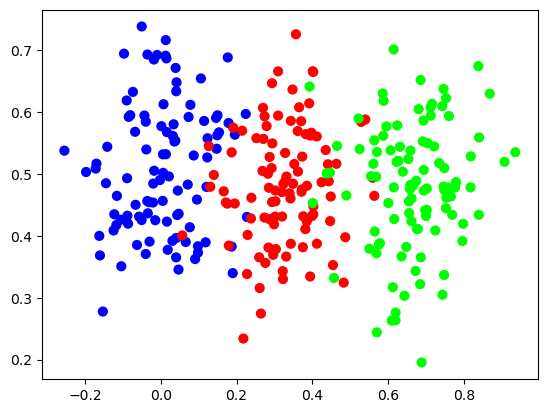

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data, spiral_data

nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [3]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


In [4]:
for iteration in range(10000):

    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through loss function
    # it takes the output of second activation function and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss


New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333


Loss certainly falls, though not by much. Accuracy did not improve, except for a singular situation where the model randomly found a set of weights yielding better accuracy. Still, with a fairly large loss, this state is not stable.



In [5]:
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):

    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through loss function
    # it takes the output of second activation function and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 1.0998446 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0995618 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 1.0984702 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0980067 acc: 0.3433333333333333
New set of weights found, iteration: 9 loss: 1.0967796 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0956235 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.0954633 acc: 0.3333333333333333
New set of weights found, iteration: 26 loss: 1.093929 acc: 0.3333333333333333
New set of weights found, iteration: 29 loss: 1.0938516 acc: 0.6666666666666666
New set of weights found, iteration: 31 loss: 1.0909564 acc: 0.38
New set of weights found, iteration: 32 loss: 1.0852133 acc: 0.6666666666666666
New set of weights found, iteration: 42 loss: 1.0805756 acc: 0.64
New set of weights found, iteration: 43 loss: 1.07986 acc: 0.3333333333333

In [7]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):

    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through loss function
    # it takes the output of second activation function and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


New set of weights found, iteration: 0 loss: 5.341027 acc: 0.37333333333333335
New set of weights found, iteration: 1 loss: 5.3296065 acc: 0.37666666666666665
New set of weights found, iteration: 2 loss: 5.3162913 acc: 0.37
New set of weights found, iteration: 3 loss: 5.306062 acc: 0.36666666666666664
New set of weights found, iteration: 4 loss: 5.2861037 acc: 0.36333333333333334
New set of weights found, iteration: 5 loss: 5.247758 acc: 0.3566666666666667
New set of weights found, iteration: 8 loss: 5.233353 acc: 0.3566666666666667
New set of weights found, iteration: 9 loss: 5.230406 acc: 0.36
New set of weights found, iteration: 12 loss: 5.2103124 acc: 0.35333333333333333
New set of weights found, iteration: 20 loss: 5.172945 acc: 0.35
New set of weights found, iteration: 21 loss: 5.14997 acc: 0.35333333333333333
New set of weights found, iteration: 22 loss: 5.149073 acc: 0.35333333333333333
New set of weights found, iteration: 26 loss: 5.1412525 acc: 0.35
New set of weights found, 